
## Problem Statement:
FoodHub Data Analysis and Prediction
## Business Context:
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.
## Project Objective:
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.

1. Exploratory Data Analysis (EDA): Analyze the structure, distribution, and relationships in the dataset.
Handle Data Quality Issues: Clean missing values, detect and treat outliers, and transform features for better analysis.

2. Classification Task (Binary Classification):Classify data points into meaningful categories to support decision-making. Example:
Order Status Classification: Predict if an order will be "on-time", "late", or "delayed".

3. Regression Task (Predictive Modeling):Predict future outcomes based on historical data. Example:
Sales Forecasting: Predict the total value of a customer's order.

4. Model Evaluation

5. Model Deployment


#### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Loading the dataset

In [ ]:
df = pd.read_csv('/content/2-foodhub_order_New.csv')

## 1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

#### 1.1 Checking the top 5 rows

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


###### Observations:
1. There are some values in rating which are required to be given.
2. In the feature delivery_time, we are having wrong entries like "?".

#### 1.2 Checking the shape (no.of rows and columns in dataset)

In [ ]:
df.shape

(1898, 9)

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

###### Result:
There are **1898** rows and **9** columns in dataset

#### 1.3 Checking the info of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


In [ ]:
df[df['cost_of_the_order']>40]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
214,1476598,41168,Parm,Italian,121920.0,Weekend,3,34.0,22


#### 1.4 Statistical summary

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time
count,1.898000e+03,1898.000000,1898.000000,1896.000000
mean,1.477496e+06,171168.478398,80.722007,27.371835
std,5.480497e+02,113698.139743,2798.141333,4.634211
min,1.476547e+06,1311.000000,0.000000,20.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000
max,1.478444e+06,405334.000000,121920.000000,35.000000


#### Observations:
* 1 - We need to check the record where cost_of_the_order is 121920.
* 2 - There are some missing values in food_preperation_time.

## 2-Exploratory Data Analysis (EDA)
* 2.1 Checking the duplicate rows and fetching them
* 2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise
* 2.3 Outliers Analysis
* 2.4 Univariate Analysis
* 2.5 Bivariate Analysis

#### 2.1 Checking the duplicate rows

In [ ]:
# total number of duplicate rows
df.duplicated().sum()

np.int64(0)

* Observation

  There are no duplicate values.


In [ ]:
# Fetching duplicate rows
df[df.duplicated()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


### 2.2 Checking Null Values

In [ ]:
# Column-wise null values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,3
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,2
delivery_time,0


##Observation
###Total Columns with Missing Data: 2 columns

####1- cuisine_type: 3 missing values.

####2- food_preparation_time: 2 missing values.

In [ ]:
# Percentage wise null values in columns
df.isnull().sum()/len(df)*100

,0
order_id,0.000000
customer_id,0.000000
restaurant_name,0.000000
cuisine_type,0.158061
cost_of_the_order,0.000000
day_of_the_week,0.000000
rating,0.000000
food_preparation_time,0.105374
delivery_time,0.000000


In [ ]:
# row-wise null values
df.isnull().sum(axis=1).sort_values(ascending=False)

,0
11,1
140,1
95,1
188,1
51,1
...,...
628,0
627,0
626,0
625,0


In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


###### Results:

* Out of the 1898 orders, 736 do not have a rating.



### 2.3 Outliers Analysis
* 2.3.1 Visualizing outliers
* 2.3.2 Finding the no. of outliers in each column

In [ ]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

### 2.3.1 Visualizing outliers

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


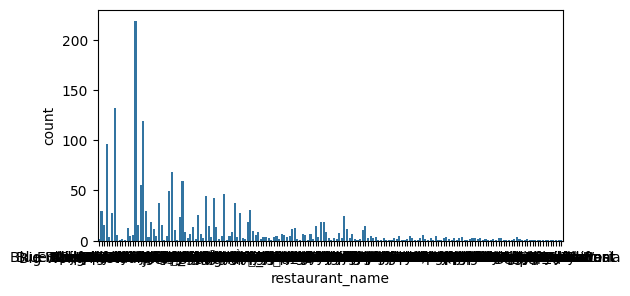

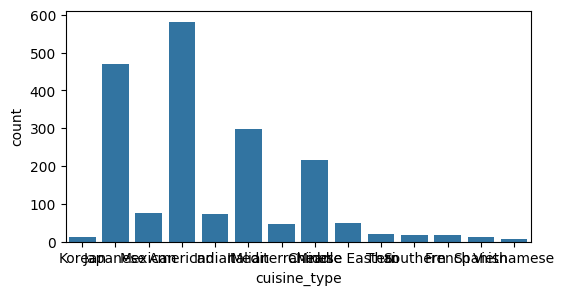

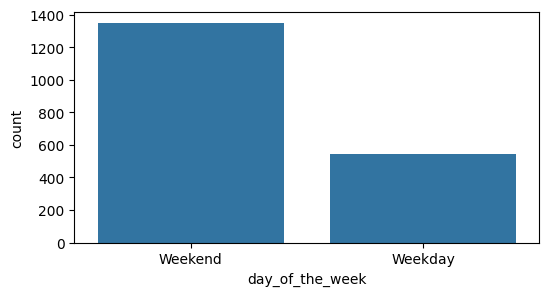

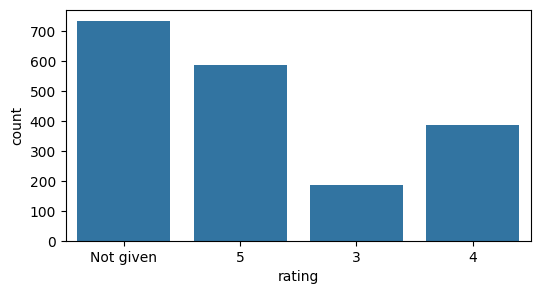

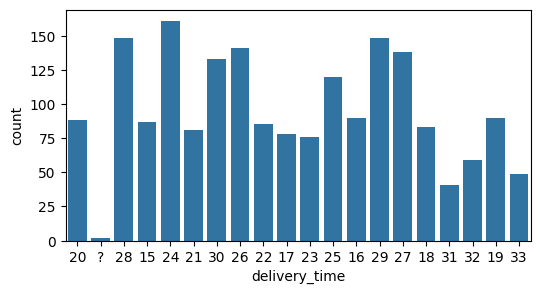

In [ ]:
for i in cat_variables.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=i)
    plt.show()

##Observations
1- A few restaurants dominate order volume, others have very few orders.

2- American and Japanese cuisines are most ordered.

3- Large number of orders have "Not_given" ratings.
Among given ratings, 4 and 5 are most frequent.

4- 'delivery_time' includes non-numeric values like "?".

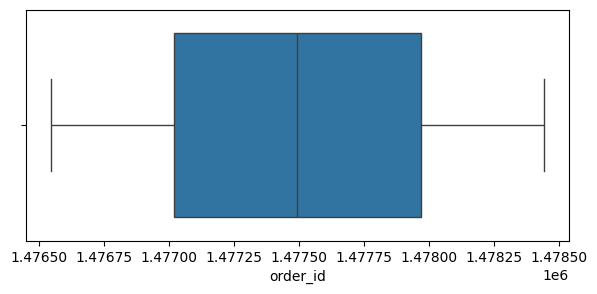

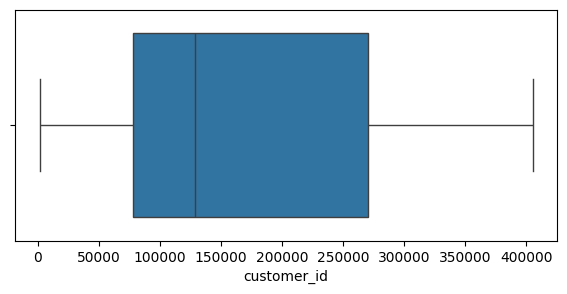

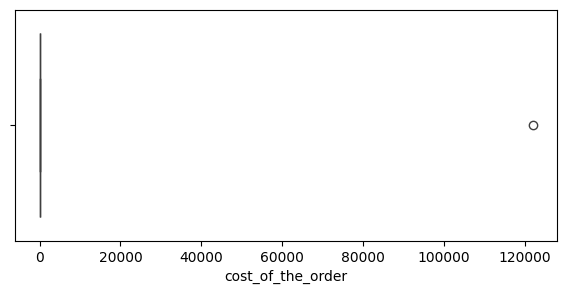

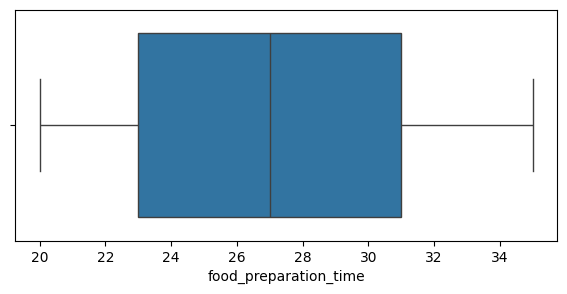

In [ ]:
for i in num_variables:
    plt.figure(figsize=(7,3))
    sns.boxplot(data=df, x=i)

### 2.3.2  Finding the no. of outliers in each column

In [ ]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  order_id : 0
-----------------------
Number of ouliers in  customer_id : 0
-----------------------
Number of ouliers in  cost_of_the_order : 1
-----------------------
Number of ouliers in  food_preparation_time : 0
-----------------------


###Observation
 * We have only one outlier in cost_of_the_order


### 2.4 Univariate Analysis

##### 2.4.1. Categorical variables visual analysis:

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


Text(0.5, 1.0, 'Countplot of delivery_time')

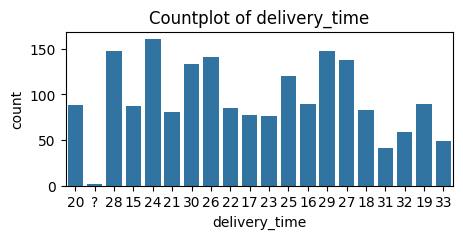

In [ ]:
plt.figure(figsize=(5,2))
sns.countplot(data=df, x='delivery_time')
plt.title('Countplot of delivery_time')

##Visual analysis:

In [ ]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

178
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
-------------
14
cuisine_type
American          582
Japanese          470
Italian           298
Chinese           215
Mexican            76
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
-------------
2
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
-------------
4
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
-------

### 2.4.3. Numerical variables analysis:

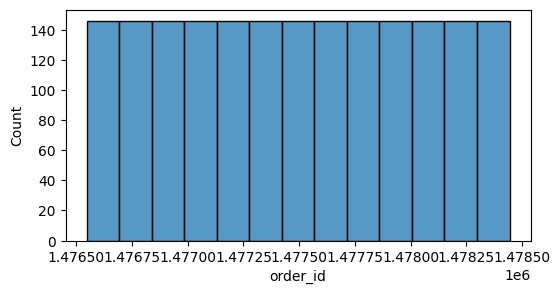

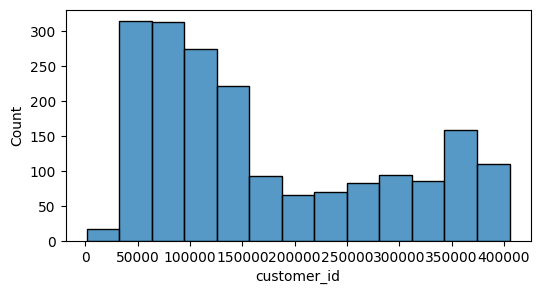

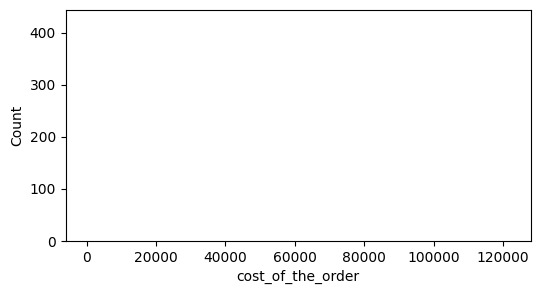

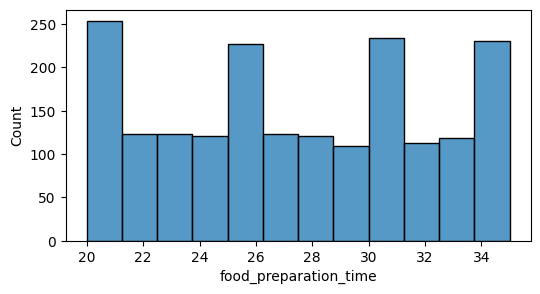

In [ ]:
for i in num_variables:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df,x=i);

### 2.5 Bi-variate analysis
* Since during model building we will be having "Rating" and "delivery_time" as our target variables so we will only do bi-variate analysis of these features only.

In [ ]:
for i in cat_variables.columns:
    print(i)
    print(df.groupby(i)['cost_of_the_order'].mean())
    print('--------------------')

restaurant_name
restaurant_name
'wichcraft           8.100000
12 Chairs           22.142500
5 Napkin Burger     15.968000
67 Burger           29.050000
Alidoro             12.610000
                      ...    
Zero Otto Nove       9.025000
brgr                 9.895000
da Umberto          17.620000
ilili Restaurant    19.067778
indikitch           12.792500
Name: cost_of_the_order, Length: 178, dtype: float64
--------------------
cuisine_type
cuisine_type
American           16.276082
Chinese            16.305209
French             19.793889
Indian             16.919726
Italian           425.505503
Japanese           16.304532
Korean             14.001538
Mediterranean      15.474783
Mexican            17.049342
Middle Eastern     18.820612
Southern           19.300588
Spanish            18.994167
Thai               19.207895
Vietnamese         12.882857
Name: cost_of_the_order, dtype: float64
--------------------
day_of_the_week
day_of_the_week
Weekday     16.311188
Weekend    106.80

In [ ]:
num_variables=df.select_dtypes(['int','float'])

<Figure size 500x200 with 0 Axes>

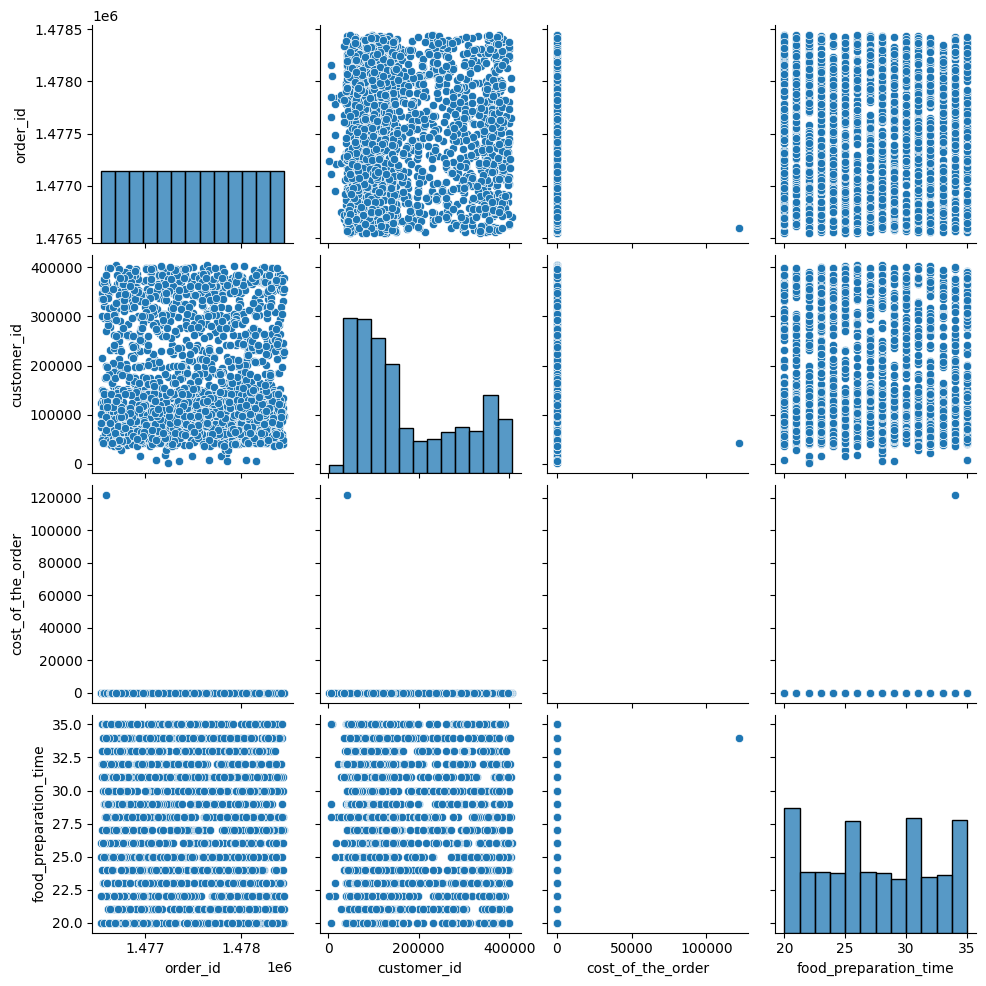

In [ ]:
plt.figure(figsize=(5,2))
sns.pairplot(num_variables);

In [ ]:
for i in cat_variables.columns:
    plt.figure(figsize=(10, 5))
    top_15 = df[i].value_counts().nlargest(15).index
    df_top = df[df[i].isin(top_15)]
    sns.barplot(data=df_top, x=i, y='delivery_time', errorbar=None, order=top_15)

    plt.gca().invert_yaxis()

    plt.xticks(rotation=45, ha='right')
    plt.title(f"{i} vs Delivery Time")
    plt.tight_layout()
    plt.show()


####  2.5.2. Relationship of  'delivery_time' with other numerical features
* Few plots which we can use are:
  * Pairplot
  * Jointplot
  * scatterplot

In [ ]:
sns.barplot(data=df, x='rating',y='delivery_time');

In [ ]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=df, y='rating',x=i);

### Checking the correlation with heatmap to check above observation

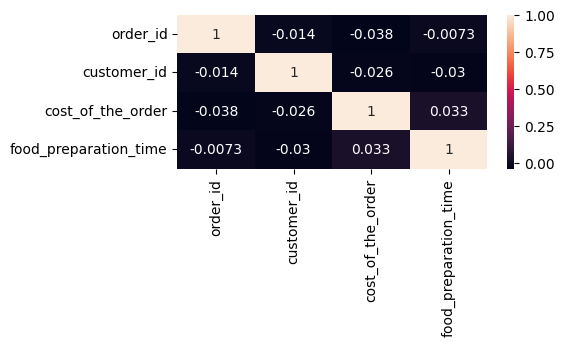

In [ ]:
corr= num_variables.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

####  2.5.3 Relationship of 'delivery_time' with all other features
* We can use following plots & tables :
    * Countplot with hue
    * crosstab
    * df.plot.bar(stacked=True)

### 2.5.3.1 Visual analysis of "delivery_time" with other categorical variables

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


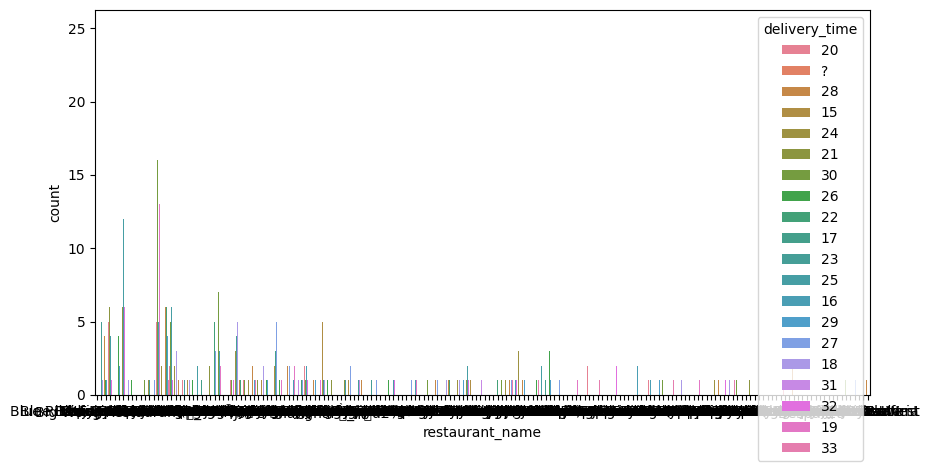

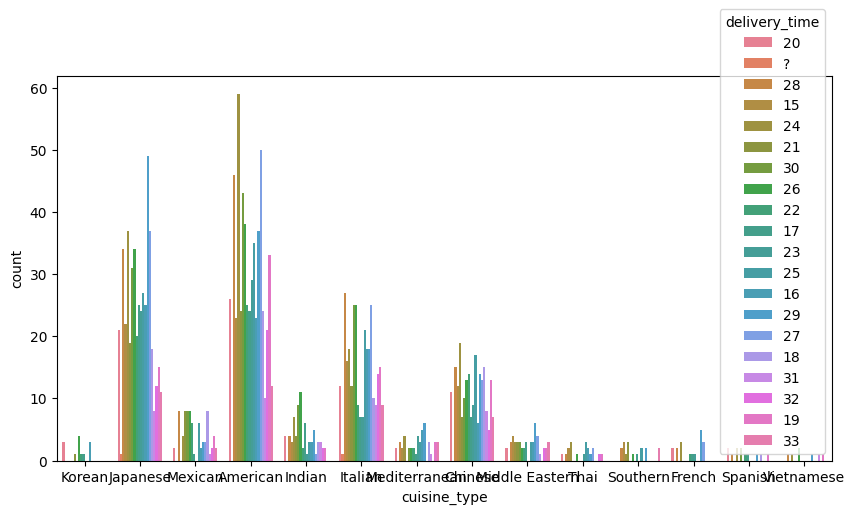

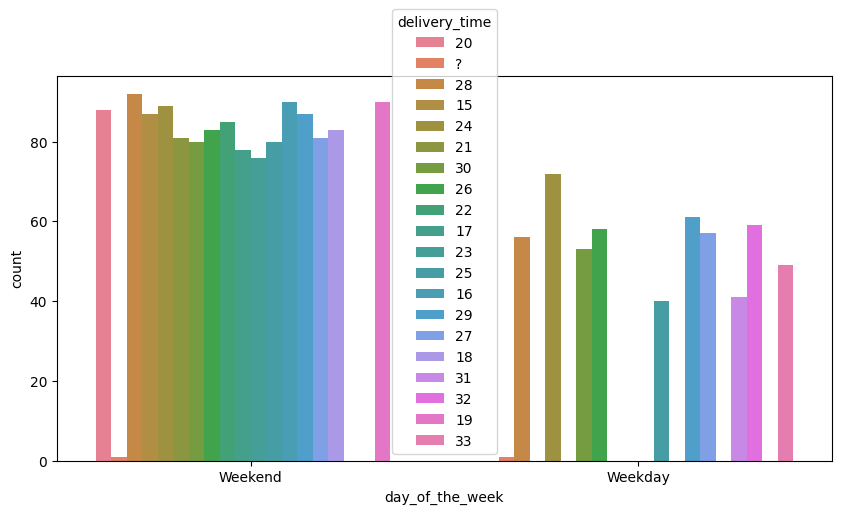

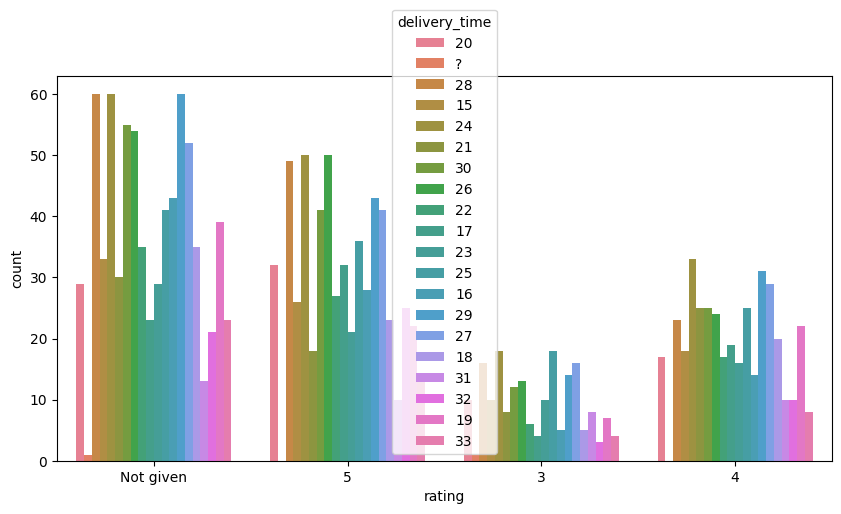

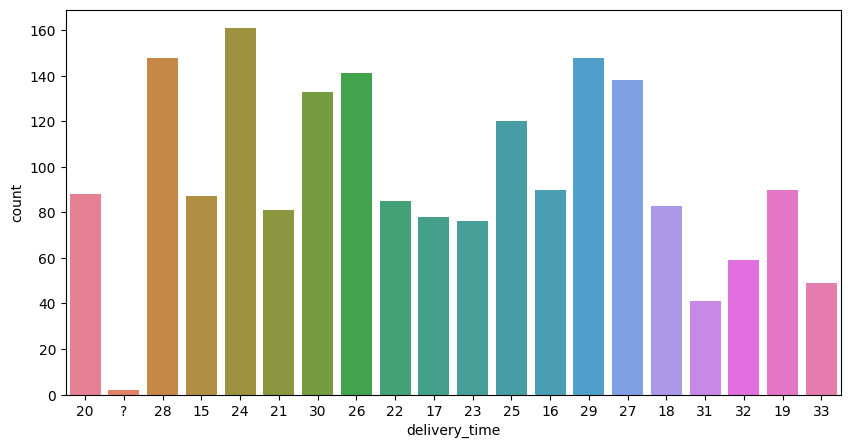

In [ ]:
for i in cat_variables.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=i, hue='delivery_time');

# 3- Data Cleaning & pre processing
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=df.drop(['restaurant_name','order_id','customer_id'], axis=1)

In [ ]:
df.head()

,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Korean,30.75,Weekend,Not given,25.0,20
1,Japanese,12.08,Weekend,Not given,25.0,?
2,Mexican,12.23,Weekday,5,23.0,28
3,American,29.20,Weekend,3,25.0,15
4,American,11.59,Weekday,4,25.0,24


In [ ]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

#### 3.1 Dropping duplicates

In [ ]:
print(" No. of rows before dropping duplicates :", df_copy.shape[0])
df_copy.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", df_copy.shape[0])

 No. of rows before dropping duplicates : 1898
 No. of rows after dropping duplicates : 1898


#### 3.2 Replacing wrong entries

##### 3.2.1 rating

In [ ]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['rating'].unique())
print("Number of Unique categories in feature : ",df_copy['rating'].nunique())
print("Count of Unique categories in feature : ",df_copy['rating'].value_counts())

Unique categories in feature :  ['Not given' '5' '3' '4']
Number of Unique categories in feature :  4
Count of Unique categories in feature :  rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


In [ ]:
df_copy2 = df_copy.copy()

In [ ]:
df_copy2['rating'] = df_copy2['rating'].astype(str)
df_copy2['rating'] = df_copy2['rating'].apply(lambda x: 'Given' if x.strip().isdigit() else 'Not given')
print(df_copy2['rating'].value_counts())

rating
Given        1162
Not given     736
Name: count, dtype: int64


In [ ]:
# After Cleaning
print("Unique categories in feature : ",df_copy['rating'].unique())
print("Number of Unique categories in feature : ",df_copy['rating'].nunique())
print("Count of Unique categories in feature : ",df_copy['rating'].value_counts())

Unique categories in feature :  ['Not given' '5' '3' '4']
Number of Unique categories in feature :  4
Count of Unique categories in feature :  rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


In [ ]:
print(df_copy['rating'].value_counts())
print(df_copy['rating'].dtypes)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
object


### 3.2.2 delivery_time

In [ ]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['delivery_time'].unique())
print("Number of Unique categories in feature : ",df_copy['delivery_time'].nunique())
print("Count of Unique categories in feature : ",df_copy['delivery_time'].value_counts())

Unique categories in feature :  ['20' '?' '28' '15' '24' '21' '30' '26' '22' '17' '23' '25' '16' '29' '27'
 '18' '31' '32' '19' '33']
Number of Unique categories in feature :  20
Count of Unique categories in feature :  delivery_time
24    161
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     76
32     59
33     49
31     41
?       2
Name: count, dtype: int64


In [ ]:
# Fetching the records where delivery_time is "?"
df_copy[df_copy['delivery_time']=='?']

,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,Japanese,12.08,Weekend,Not given,25.0,?
180,Italian,14.60,Weekday,3,32.0,?


In [ ]:
df_copy['delivery_time']=df_copy['delivery_time'].replace('?',df_copy['delivery_time'].mode()[0])

In [ ]:
# After Cleaning
print("Unique categories in feature : ",df_copy['delivery_time'].unique())
print("Number of Unique categories in feature : ",df_copy['delivery_time'].nunique())
print("Count of Unique categories in feature : ",df_copy['delivery_time'].value_counts())

Unique categories in feature :  ['20' '24' '28' '15' '21' '30' '26' '22' '17' '23' '25' '16' '29' '27'
 '18' '31' '32' '19' '33']
Number of Unique categories in feature :  19
Count of Unique categories in feature :  delivery_time
24    163
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     76
32     59
33     49
31     41
Name: count, dtype: int64


In [ ]:
df_copy['delivery_time'].value_counts()

,count
delivery_time,
24,163
28,148
29,148
26,141
27,138
30,133
25,120
19,90
16,90


In [ ]:
df_copy[df_copy['delivery_time']=='?']

,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


#### 3.3 Missing values Treatment

| Acronym  | Full Form                    | Meaning                                                                        | Bias Introduced | Example                                                                        |
| -------- | ---------------------------- | ------------------------------------------------------------------------------ | --------------- | ------------------------------------------------------------------------------ |
| **MCAR** | Missing Completely At Random | The missingness has **no relation** to any data, observed or missing.          | ❌ No            | A sensor randomly fails and misses temperature readings.                       |
| **MAR**  | Missing At Random            | The missingness is **related to observed data**, not the missing value itself. | ✅ Yes (mild)    | People with higher incomes are less likely to report income, but age is known. |
| **MNAR** | Missing Not At Random        | The missingness is related to the **missing value itself**.                    | ✅ High          | People with very low income tend to skip the income question.                  |


##### Example
| Name  | Age | Income |
| ----- | --- | ------ |
| Alice | 25  | 50k    |
| Bob   | 30  | NaN    |
| Carol | NaN | 70k    |
| David | 40  | NaN    |


* MCAR: Missing income for Bob and David is due to random system error.
* MAR: Missing income depends on age (older people don't report income), but income itself doesn't influence missingness.
* MNAR: Income is missing because it's very high or very low, and people choose not to report it.

| Type | Can You Impute?                           | Need Advanced Methods?                         |
| ---- | ----------------------------------------- | ---------------------------------------------- |
| MCAR | ✅ Yes (Mean/Median Imputation)            | ❌ No                                           |
| MAR  | ✅ Yes (Advanced Imputers: KNN, Iterative) | ⚠️ Maybe                                       |
| MNAR | ❌ Not reliably                            | ✅ Yes (Model-based or domain knowledge needed) |


# Null values Treatment general guideline:
* Check the datatype of feature:
  * If datatype== Categorical ; replace null values with mode
  * If datatype== Numerical:
    * Check for outliers:
      * If outliers are present; replace null values with median
      * If outliers are NOT present; replace null values with mean

In [ ]:
df.isnull().sum()

,0
cuisine_type,3
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,2
delivery_time,0


In [ ]:
# Filling null values using fillna- cuisine_type, food_preparation_time

In [ ]:
df_copy['cuisine_type'].mode()[0]

'American'

In [ ]:
df_copy['cuisine_type'] = df_copy['cuisine_type'].fillna(df_copy['cuisine_type'].mode()[0])

In [ ]:
df_copy['food_preparation_time'].mean()

np.float64(27.371835443037973)

In [ ]:
df_copy['food_preparation_time'] = df_copy['food_preparation_time'].fillna(df_copy['food_preparation_time'].mean())

In [ ]:
df_copy['delivery_time'].mode()[0]

'24'

In [ ]:
df_copy['delivery_time'] = df_copy['delivery_time'].fillna(df_copy['delivery_time'].mode()[0])

In [ ]:
df_copy.isnull().sum()

,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
df_copy.to_csv('df_copy.csv', index=False)

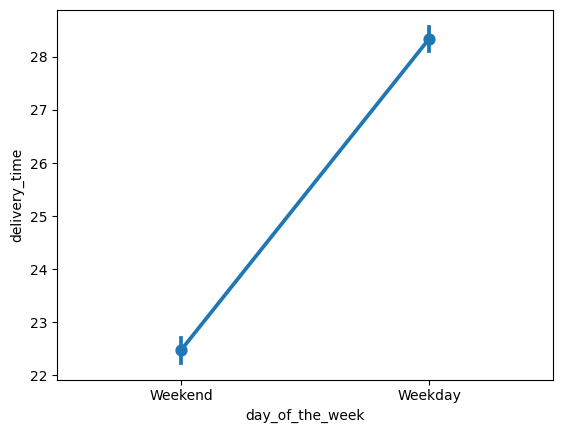

In [ ]:
sns.pointplot(data=df_copy, x='day_of_the_week',y=df_copy['delivery_time'].astype('int'));

##### Other popular methods

| Method                                 | Description                                              |
| -------------------------------------- | -------------------------------------------------------- |
| `ffill()` / `bfill()`                  | Forward or backward fill values                          |
| Mode/Median Imputation                 | Use most frequent / median value                         |
| KNN Imputer (`KNNImputer`)             | Predict null values using nearest neighbors              |
| Iterative Imputer (`IterativeImputer`) | Uses regression models to predict missing values         |
| Drop missing (`dropna`)                | Drop rows/columns with missing values (when appropriate) |
| Domain-specific value                  | E.g., fill age with 0 only if 0 means "unknown"          |


## 3.4 Outliers Treatment

#### 1. Popular Methods for Outlier Detection & Treatment

| Method                           | Type         | Handles   | Robustness  | When to Use                   |
| -------------------------------- | ------------ | --------- | ----------- | ----------------------------- |
| **IQR (Interquartile Range)**    | Univariate   | Numerical | ✅ Robust    | Simple, small-medium datasets |
| **Z-Score**                      | Univariate   | Numerical | ❌ Sensitive | Normal-like distributions     |
| **Percentile Capping**           | Univariate   | Numerical | ✅ Robust    | Quick wins, business rules    |
| **Isolation Forest**             | Multivariate | Numerical | ✅ Good      | Large, high-dimensional data  |
| **DBSCAN (Clustering)**          | Multivariate | All       | ✅ Moderate  | Cluster-shaped datasets       |
| **Boxplots / Visual Inspection** | Univariate   | Numerical | Manual      | For EDA or small data         |
| **LOF (Local Outlier Factor)**   | Multivariate | All       | ✅ High      | Density-based outliers        |


In [ ]:
df_copy2= pd.read_csv('df_copy.csv')

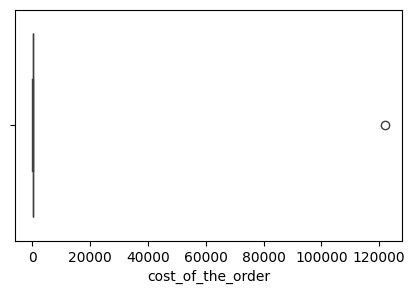

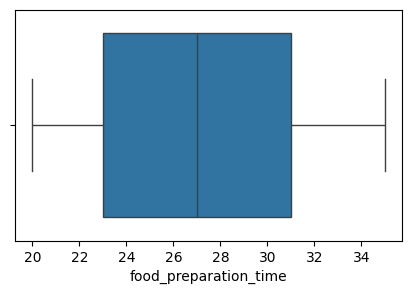

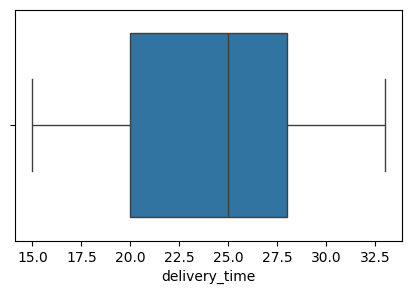

In [ ]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df_copy2,x=i);

In [ ]:
# A.IQR Method (Interquartile Range)
Q1 = df_copy2['cost_of_the_order'].quantile(0.25)
Q3 = df_copy2['cost_of_the_order'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
median = df_copy2['cost_of_the_order'].median()
lower,upper

(np.float64(-3.264999999999999), np.float64(37.655))

In [ ]:
# Filter out outliers
df_copy2[(df_copy2['cost_of_the_order'] <= lower) | (df_copy2['cost_of_the_order'] >= upper)]

,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
214,Italian,121920.0,Weekend,3,34.0,22


In [ ]:
df_copy2['cost_of_the_order'].quantile(0.99)

np.float64(33.03)

In [ ]:
df_copy2['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,80.722007
std,2798.141333
min,0.000000
25%,12.080000
50%,14.160000
75%,22.310000
max,121920.000000


In [ ]:
df_copy2['cost_of_the_order'] =np.where(df_copy2['cost_of_the_order']<= lower,df_copy2['cost_of_the_order'].median(),df_copy2['cost_of_the_order'])
df_copy2['cost_of_the_order'] =np.where(df_copy2['cost_of_the_order']>= upper,df_copy2['cost_of_the_order'].median(),df_copy2['cost_of_the_order'])

In [ ]:
df_copy2[(df_copy2['cost_of_the_order'] <= lower) | (df_copy2['cost_of_the_order'] >= upper)]

,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


In [ ]:
df_copy2['cost_of_the_order'] = np.where(df_copy2['cost_of_the_order'] <= lower, median, df_copy2['cost_of_the_order'])


In [ ]:
df_copy2['rating'].describe()

,rating
count,1898
unique,4
top,Not given
freq,736


In [ ]:
df_copy2['rating'] =np.where(df_copy2['rating']==0,df_copy2['rating'].mode()[0],df_copy2['rating'])

In [ ]:
df_copy2.to_csv('df_copy3.csv', index=False)

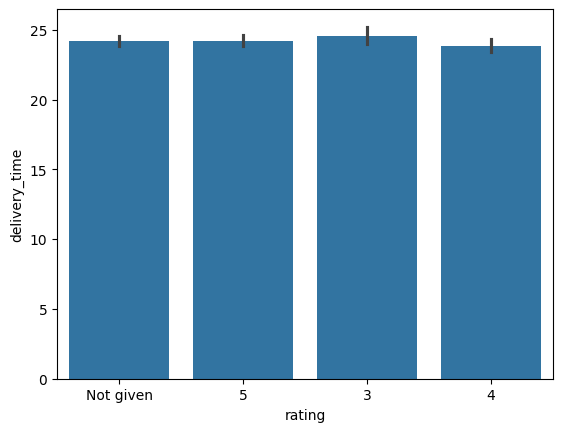

In [ ]:
sns.barplot(data=df_copy2, x='rating',y='delivery_time');

##### Comparison Summary
| Method           | Speed     | Interpretability | Works on Multivariate | Scikit-learn Support |
| ---------------- | --------- | ---------------- | --------------------- | -------------------- |
| IQR              | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Z-Score          | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Winsorization    | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No (in `scipy`)    |
| Isolation Forest | ⚠️ Slower | ✅ Moderate       | ✅ Yes                 | ✅ Yes                |
| LOF              | ⚠️ Slower | ⚠️ Hard          | ✅ Yes                 | ✅ Yes                |


## 3.5 Encoding

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [ ]:
df_3= pd.read_csv('df_copy3.csv')

In [ ]:
df_copy2['cuisine_type'] = df_copy2['cuisine_type'].astype('category').cat.codes

In [ ]:
df_3.head()

,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Korean,30.75,Weekend,Not given,25.0,20
1,Japanese,12.08,Weekend,Not given,25.0,24
2,Mexican,12.23,Weekday,5,23.0,28
3,American,29.20,Weekend,3,25.0,15
4,American,11.59,Weekday,4,25.0,24


In [ ]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])

In [ ]:
cat_variables.columns

Index(['cuisine_type', 'day_of_the_week', 'rating'], dtype='object')

In [ ]:
cat_variables.head(3)

,cuisine_type,day_of_the_week,rating
0,Korean,Weekend,Not given
1,Japanese,Weekend,Not given
2,Mexican,Weekday,5


##Nominal encoding

In [ ]:
# 2. Nominal encoding
nominal_features=['cuisine_type','day_of_the_week']
for i in nominal_features:
    print(i,";")
    print(pd.Categorical(cat_variables[i],ordered= False))
    print(pd.Categorical(cat_variables[i],ordered= False).codes)
    print('----------------------------------------')
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

cuisine_type ;
['Korean', 'Japanese', 'Mexican', 'American', 'American', ..., 'Mexican', 'American', 'Japanese', 'Mediterranean', 'Japanese']
Length: 1898
Categories (14, object): ['American', 'Chinese', 'French', 'Indian', ..., 'Southern', 'Spanish', 'Thai',
                          'Vietnamese']
[6 5 8 ... 5 7 5]
----------------------------------------
day_of_the_week ;
['Weekend', 'Weekend', 'Weekday', 'Weekend', 'Weekday', ..., 'Weekend', 'Weekend', 'Weekday', 'Weekday', 'Weekend']
Length: 1898
Categories (2, object): ['Weekday', 'Weekend']
[1 1 0 ... 0 0 1]
----------------------------------------


In [ ]:
cat_variables.head()

,cuisine_type,day_of_the_week,rating
0,6,1,Not given
1,5,1,Not given
2,8,0,5
3,0,1,3
4,0,0,4


In [ ]:
# 3. One Hot encoding
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['rating'], dtype=int)
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.head()

,cost_of_the_order,food_preparation_time,delivery_time,cuisine_type,day_of_the_week,rating_3,rating_4,rating_5,rating_Not given
0,30.75,25.0,20,6,1,0,0,0,1
1,12.08,25.0,24,5,1,0,0,0,1
2,12.23,23.0,28,8,0,0,0,1,0
3,29.20,25.0,15,0,1,1,0,0,0
4,11.59,25.0,24,0,0,0,1,0,0


In [ ]:
df_encoded.head()

,cost_of_the_order,food_preparation_time,delivery_time,cuisine_type,day_of_the_week,rating_3,rating_4,rating_5,rating_Not given
0,30.75,25.0,20,6,1,0,0,0,1
1,12.08,25.0,24,5,1,0,0,0,1
2,12.23,23.0,28,8,0,0,0,1,0
3,29.20,25.0,15,0,1,1,0,0,0
4,11.59,25.0,24,0,0,0,1,0,0


In [ ]:
cat_variables['day_of_the_week'].value_counts()

,count
day_of_the_week,
1,1351
0,547


In [ ]:
cat_variables['cuisine_type'].value_counts()

,count
cuisine_type,
0,585
5,470
4,298
1,215
8,76
3,73
9,49
7,46
12,19


In [ ]:
df_encoded.to_csv('df_encoded', index=False)

In [ ]:
df_encoded.head()

,cost_of_the_order,food_preparation_time,delivery_time,cuisine_type,day_of_the_week,rating_3,rating_4,rating_5,rating_Not given
0,30.75,25.0,20,6,1,0,0,0,1
1,12.08,25.0,24,5,1,0,0,0,1
2,12.23,23.0,28,8,0,0,0,1,0
3,29.20,25.0,15,0,1,1,0,0,0
4,11.59,25.0,24,0,0,0,1,0,0


##### Common encoding techniques:
| Encoding Method      | Type of Data | Pros                  | Cons                             |
| -------------------- | ------------ | --------------------- | -------------------------------- |
| Label Encoding       | Ordinal      | Simple                | Imposes order on nominal data    |
| One-Hot Encoding     | Nominal      | No order imposed      | High dimensionality              |
| Ordinal Encoding     | Ordinal      | Preserves order       | You must define the order        |
| Frequency Encoding   | Nominal      | Simple, compact       | May mislead the model            |
| Target/Mean Encoding | Nominal      | Can boost performance | Risk of overfitting/data leakage |


#### Difference in `pd.Categorical` technique and Sklearn's `LabelEncoder` / `OrdinalEncoder`
| Feature                    | `pd.Categorical`      | `LabelEncoder` / `OrdinalEncoder` |
| -------------------------- | --------------------- | --------------------------------- |
| Built into Pandas          | ✅ Yes                 | ❌ No                              |
| Easy for quick exploration | ✅ Very                | ➖ Slightly more verbose           |
| Custom category ordering   | ✅ Yes                 | ✅ Yes                             |
| Part of sklearn pipelines  | ❌ Not natively        | ✅ Integrates well                 |
| Handles unknown values     | ❌ Fails or assigns -1 | ✅ Can handle with parameters      |


## 3.6 Train Test Split (Required when building model for predictions)
#### What is train_test_split?
train_test_split is a function from scikit-learn used to split your dataset into two parts:

Training set – to train the model

Validation set – to evaluate the model's performance

#### Why is it required?
When building machine learning models, we train the model on one portion of the data and test it on unseen data to check how well it generalizes.

This prevents overfitting and gives a fair estimate of model accuracy.

In [ ]:
df_TrainTestSplit= pd.read_csv('df_encoded')

In [ ]:
df_TrainTestSplit.head()

,cost_of_the_order,food_preparation_time,delivery_time,cuisine_type,day_of_the_week,rating_3,rating_4,rating_5,rating_Not given
0,30.75,25.0,20,6,1,0,0,0,1
1,12.08,25.0,24,5,1,0,0,0,1
2,12.23,23.0,28,8,0,0,0,1,0
3,29.20,25.0,15,0,1,1,0,0,0
4,11.59,25.0,24,0,0,0,1,0,0


#### Separating Features and Target

In [ ]:
X = df_TrainTestSplit.drop('delivery_time', axis=1)
y = df_TrainTestSplit['delivery_time']

In [ ]:
X.head()

,cost_of_the_order,food_preparation_time,cuisine_type,day_of_the_week,rating_3,rating_4,rating_5,rating_Not given
0,30.75,25.0,6,1,0,0,0,1
1,12.08,25.0,5,1,0,0,0,1
2,12.23,23.0,8,0,0,0,1,0
3,29.20,25.0,0,1,1,0,0,0
4,11.59,25.0,0,0,0,1,0,0


In [ ]:
y

,delivery_time
0,20
1,24
2,28
3,15
4,24
...,...
1893,17
1894,19
1895,24
1896,31


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

In [ ]:
X_train.head()

,cost_of_the_order,food_preparation_time,cuisine_type,day_of_the_week,rating_3,rating_4,rating_5,rating_Not given
659,12.61,32.0,5,1,0,0,1,0
1155,6.69,26.0,5,0,0,1,0,0
1793,10.86,28.0,5,0,0,1,0,0
975,14.07,31.0,0,1,0,0,0,1
654,13.19,22.0,8,0,0,0,1,0


## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

In [ ]:
X_train.columns

Index(['cost_of_the_order', 'food_preparation_time', 'cuisine_type',
       'day_of_the_week', 'rating_3', 'rating_4', 'rating_5',
       'rating_Not given'],
      dtype='object')

In [ ]:
cat_cols=['cuisine_type','rating_3', 'rating_4', 'rating_5', 'rating_Not given','day_of_the_week']
num_cols= ['cost_of_the_order', 'food_preparation_time']

###1. Min-Max Scaling

In [ ]:
# 1. Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
Xtrain_scaled_MinMax = MMscaler.fit_transform(X_train[num_cols])
Xval_scaled_MinMax = MMscaler.transform(X_val[num_cols])

In [ ]:
Xtrain_scaled_MinMax=pd.DataFrame(Xtrain_scaled_MinMax,columns=X_train[num_cols].columns)
Xval_scaled_MinMax=pd.DataFrame(Xval_scaled_MinMax,columns=X_val[num_cols].columns)

In [ ]:
Xtrain_scaled_MinMax.head(2)

,cost_of_the_order,food_preparation_time
0,0.356114,0.8
1,0.188930,0.4


##2. Z-score Scaling (standardization)

In [ ]:
# 2. z-score Scaling (standardization)
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

In [ ]:
Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

In [ ]:
Xtrain_scaled_StandardScalar.head()

,cost_of_the_order,food_preparation_time
0,-0.522802,0.994343
1,-1.319273,-0.301057
2,-0.758245,0.130743
3,-0.326376,0.778443
4,-0.444770,-1.164658


In [ ]:
cat_cols = [col for col in cat_cols if col in X_train.columns]


In [ ]:
scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols]],axis=1)
scaled_test=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols]],axis=1)

In [ ]:
round(Xtrain_scaled_StandardScalar.describe(),2)

,cost_of_the_order,food_preparation_time
count,1518.00,1518.00
mean,0.00,-0.00
std,1.00,1.00
min,-2.22,-1.60
25%,-0.59,-0.95
50%,-0.31,-0.09
75%,0.78,0.78
max,2.54,1.64


In [ ]:
X_train[num_cols].head(2)

,cost_of_the_order,food_preparation_time
659,12.61,32.0
1155,6.69,26.0


In [ ]:
Xtrain_scaled_StandardScalar.head(2)

,cost_of_the_order,food_preparation_time
0,-0.522802,0.994343
1,-1.319273,-0.301057


In [ ]:
Xtrain_scaled_StandardScalar.shape

(1518, 2)

In [ ]:
X_train[cat_cols].shape

(1518, 6)

In [ ]:
X_train[cat_cols].reset_index(drop=True)

,cuisine_type,rating_3,rating_4,rating_5,rating_Not given,day_of_the_week
0,5,0,0,1,0,1
1,5,0,1,0,0,0
2,5,0,1,0,0,0
3,0,0,0,0,1,1
4,8,0,0,1,0,0
...,...,...,...,...,...,...
1513,8,1,0,0,0,1
1514,1,0,1,0,0,1
1515,0,0,0,1,0,1
1516,1,0,0,1,0,1


In [ ]:
scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols].reset_index(drop=True)],axis=1)
scaled_test=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols].reset_index(drop=True)],axis=1)

In [ ]:
scaled_train.to_csv('Scaled_data_train')
scaled_test.to_csv('Scaled_data_val')

#### Summary Table of most popular methods;
| Method          | Range    | Affected by Outliers | Use Case                            |
| --------------- | -------- | -------------------- | ----------------------------------- |
| Min-Max Scaling | \[0, 1]  | ✅ Yes                | Image data, bounded values          |
| Standardization | \~N(0,1) | ❌ Less               | Linear models, SVM, Neural Networks |
| Robust Scaling  | Depends  | ❌ No                 | Data with outliers                  |
| MaxAbs Scaling  | \[-1, 1] | ❌ Less               | Sparse data (e.g., NLP features)    |


# 4-Model Building (Regression), Evaluation & Tuning

### 4.1 Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting
        * Adaboost,
        * Gboost,
        * XGboost
### 4.2 Model Evaluation: Regression metrics: R² & RMSE
1. R-squared (R²) — Coefficient of Determination
    * What it means:
        * Measures how well the model explains the variability in the target variable.
        * Value lies between 0 and 1 (can be negative if model performs worse than the mean).
    * Interpretation:
        * R² = 1 → perfect prediction
        * R² = 0 → model is no better than the average
        * Higher is better
2. RMSE — Root Mean Squared Error
    * What it means:
        * Measures average prediction error in the same units as the target variable.
        * It gives more weight to larger errors.
    * Interpretation:
        * Lower is better
        * Easy to interpret because it’s in the same unit as
### 4.3 Model Tuning
    * GridSearchCV
    * Hyper Parameter Tuning


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# pip install xgboost
from xgboost import XGBRegressor

In [ ]:
# loading the encoded data
df_TrainTestSplit= pd.read_csv('df_encoded')

#seperating the target variable from rest of the data
X = df_TrainTestSplit.drop('delivery_time', axis=1)
y = df_TrainTestSplit['delivery_time']

# Splitting the data into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

cat_cols=['cuisine_type','rating_3', 'rating_4', 'rating_5', 'rating_Not given','day_of_the_week']
num_cols= ['cost_of_the_order', 'food_preparation_time']

from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols].reset_index(drop=True)],axis=1)
scaled_val=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols].reset_index(drop=True)],axis=1)

In [ ]:
# loading the datasets
df_TrainTestSplit= pd.read_csv('df_encoded')
X = df_TrainTestSplit.drop('delivery_time', axis=1)
y = df_TrainTestSplit['delivery_time']
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)
x_trainFinal= pd.read_csv('Scaled_data_train')
x_valFinal= pd.read_csv('Scaled_data_val')

In [ ]:
# Building a Linear regression model
LR = LinearRegression()
LR.fit(scaled_train,y_train)

y_train_pred = LR.predict(scaled_train)
y_val_pred = LR.predict(scaled_val)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

Train RMSE 4.21002122072206 | Train R2 0.289213740241521
Test RMSE 4.167355729845208 | Test R2 0.26801189334127273


In [ ]:
# Building a knn model
knn = KNeighborsRegressor()
knn.fit(scaled_train,y_train)
y_train_pred = knn.predict(scaled_train)
y_val_pred = knn.predict(scaled_val)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

Train RMSE 3.886373614083918 | Train R2 0.3942972411125266
Test RMSE 4.634084250648154 | Test R2 0.09487048362276918


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}
results = []
for name, model in models.items():
    model.fit(scaled_train, y_train)

    # Predictions
    y_train_pred = model.predict(scaled_train)
    y_val_pred = model.predict(scaled_val)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store result
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df

,Model,Train_RMSE,Train_R²,Val_RMSE,Val_R²
0,Linear Regression,4.210021,0.289214,4.167356,0.268012
1,KNN,3.886374,0.394297,4.634084,0.094870
2,Decision Tree,0.638657,0.983643,5.653248,-0.347035
3,Random Forest,1.795197,0.870761,4.537006,0.132396
4,AdaBoost,4.188142,0.296582,4.148919,0.274474
5,Gradient Boosting,3.894560,0.391743,4.342401,0.205228
6,XGBoost,1.780130,0.872921,4.966863,-0.039794


In [ ]:
knn = KNeighborsRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

for name, model in models.items():
    # Cross-validation scores (negative RMSE)
    neg_mse_scores = cross_val_score(model, scaled_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, scaled_train, y_train, scoring='r2', cv=cv)

    cv_rmse_mean = -np.mean(neg_mse_scores)
    cv_r2_mean = np.mean(r2_scores)

    # Train model on full training data
    model.fit(scaled_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(scaled_val)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "CV_RMSE_(Train)": cv_rmse_mean,
        "Val_RMSE": val_rmse,
        "CV_R²_(Train)": cv_r2_mean,
        "Val_R²": val_r2
    })

# Display final results
results_df = pd.DataFrame(results)
results_df

,Model,CV_RMSE_(Train),Val_RMSE,CV_R²_(Train),Val_R²
0,Linear Regression,4.228807,4.167356,0.279375,0.268012
1,KNN,4.760353,4.634084,0.086822,0.094870
2,Decision Tree,6.075877,5.632261,-0.512656,-0.337053
3,Random Forest,4.542072,4.536783,0.160469,0.132481
4,AdaBoost,4.243856,4.163817,0.278216,0.269254
5,Gradient Boosting,4.271753,4.342888,0.264256,0.205050
6,XGBoost,5.045300,4.966863,-0.027037,-0.039794


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the model
ridge_model = Ridge()

# Define hyperparameter grid for Ridge
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(scaled_train, y_train)

# Best model and parameters
best_ridge = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train performance
y_train_pred = best_ridge.predict(scaled_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation performance
y_val_pred = best_ridge.predict(scaled_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Best Hyperparameters for Ridge Regression:")
print(best_params)

print("\nPerformance Metrics:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters for Ridge Regression:
{'alpha': 1}

Performance Metrics:
Train RMSE: 4.2100
Train R²   : 0.2892
Val RMSE   : 4.1671
Val R²     : 0.2681


In [ ]:
# Define model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid search
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_xgb.fit(scaled_train, y_train)

# Best model and params
best_xgb = grid_xgb.best_estimator_
best_xgb_params = grid_xgb.best_params_

# Train evaluation
y_train_pred = best_xgb.predict(scaled_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation evaluation
y_val_pred = best_xgb.predict(scaled_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Output
print(" Best Hyperparameters for XGBoost:")
print(best_xgb_params)

print("\n XGBoost Performance:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
 Best Hyperparameters for XGBoost:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}

 XGBoost Performance:
Train RMSE: 4.1315
Train R²   : 0.3155
Val RMSE   : 4.1552
Val R²     : 0.2723


# 5-Model Building (Classification), Evaluation & Tuning
* Data splitting
* Classification algorithms
    * Logistic Regression
    * Naive Bayes, KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Classification metrics:Accuracy, Precision, Recall, F1-score, Confusion matrix,ROC Curve, AUC
* Model Tuning
    * GridSearchCV
    * RandomSearchCV

In [ ]:
df_3= pd.read_csv('df_copy3.csv')

In [ ]:
df_3.head()

,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Korean,30.75,Weekend,Not given,25.0,20
1,Japanese,12.08,Weekend,Not given,25.0,24
2,Mexican,12.23,Weekday,5,23.0,28
3,American,29.20,Weekend,3,25.0,15
4,American,11.59,Weekday,4,25.0,24


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score,recall_score, f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [ ]:
# Load the cleaned dataset
df = pd.read_csv("df_copy3.csv")

In [ ]:
df['rating'] = df['rating'].astype(str)
df['rating'] = df['rating'].apply(lambda x: 'Given' if x.strip().isdigit() else 'Not given')

In [ ]:
# Encode target
le = LabelEncoder()
df['rating'] = le.fit_transform(df['rating'])

In [ ]:
df = df.drop(columns=['delivery_time'])

In [ ]:
X = df.drop('rating', axis=1)
y = df['rating']

In [ ]:
#Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

In [ ]:
num_cols = ['cost_of_the_order', 'food_preparation_time']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1.4)
}

# 8. Evaluate models
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    print("Classification Report:")
    print(classification_report(y_val, y_pred, target_names=["Not Given", "Given"]))

    print(f" ROC AUC Score: {roc_auc_score(y_val, y_proba):.4f}")



Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

   Not Given       0.57      0.45      0.51       221
       Given       0.41      0.53      0.46       159

    accuracy                           0.48       380
   macro avg       0.49      0.49      0.48       380
weighted avg       0.50      0.48      0.49       380

 ROC AUC Score: 0.4744

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

   Not Given       0.58      0.73      0.65       221
       Given       0.43      0.28      0.34       159

    accuracy                           0.54       380
   macro avg       0.51      0.50      0.49       380
weighted avg       0.52      0.54      0.52       380

 ROC AUC Score: 0.4808

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

   Not Given       0.56      0.65      0.60       221
       Given       0.38      0.30      0.33       159

 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:01:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##Conclusion
* We attempted to classify whether users gave a rating after placing an order using various machine learning models (Logistic Regression, Random Forest, XGBoost). Despite extensive preprocessing and balancing, the models performed poorly (AUC ~0.5), indicating the available features are not predictive enough for user behavior like rating.
* Ratings may depend more on subjective factors (taste, delivery quality, user mood) not captured in this dataset. Therefore, classification results are weak.